In [1]:
import pandas as pd
import numpy as np
from initializer import init, CSV_BASE_DIR

init()

# Pandas Combining

## Appending new rows to DataFrame

### Append without using `append()` (using `loc`)

In [2]:
df = pd.DataFrame(columns=['a', 'b'])

#### Add Data as `list`

In [3]:
df.loc[0] = [1, 2]
df.loc['Foo'] = [1, 2]
df.head()

,a,b
0,1,2
Foo,1,2


#### Add data as `dict`

In [4]:
df.loc[len(df)] = {'a': 'Foo', 'b': 'Bar'}
df.head()

,a,b
0,1,2
Foo,1,2
2,Foo,Bar


#### Add data as `Series`

In [5]:
df.loc['Bar'] = pd.Series({'a': 'Hello', 'b': 'World'})
df.head()

,a,b
0,1,2
Foo,1,2
2,Foo,Bar
Bar,Hello,World


In [6]:
# 덮어쓰기 가능
df.loc['Bar'] = pd.Series({'a': 'Pandas', 'b': 'Hater'})
df

,a,b
0,1,2
Foo,1,2
2,Foo,Bar
Bar,Pandas,Hater


> 위 방식들은 모두 `inplace` 방식이라고 한다.

`inplace` 방식은 기존 데이터를 직접 접근해서 값을 변경하는 것을 의미한다.
다른 방식들은 원본 DataFrame을 보존하고 복사된 새로운 DataFrame을 사용한다.

### Append using `append()` ... ~~Deprecated~~

- 위의 `loc`과는 다르게 not in-place(returns a new copy of the DataFrame)
- `append()`: it only accept
    - `DataFrame`
    - `Series`
    - `Dictionary`
    - list of these(Not `list` itself)

In [7]:
names_df = pd.DataFrame(
    {
        'name': ['철수', '영희', '영수', '영미'],
        'age': [12, 13, 14, 15]
    },
    index=['Canada', 'Canada', 'USA', 'USA']
)

names_df

,name,age
Canada,철수,12
Canada,영희,13
USA,영수,14
USA,영미,15


In [8]:
# ERROR! index를 어떤 값을 설정할지 모르기 때문
# > TypeError: Can only append a dict if ignore_index=True
names_df.append({'name': '명수', 'age': 10})

/var/folders/19/zmm26ll95zb7drffrjsdx8_h0000gn/T/ipykernel_25055/4199018086.py:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  names_df.append({'name': '명수', 'age': 10})


TypeError: Can only append a dict if ignore_index=True

#### `ignore_index=True`

- 이전 index 값들이 reset 된다.

In [10]:
names_df.append(
    {'name': '명수', 'age': 10},
    ignore_index=True
)
pd.concat([names_df, pd.DataFrame([['명수', 10]], columns=['name', 'age'])], ignore_index=True)

/var/folders/19/zmm26ll95zb7drffrjsdx8_h0000gn/T/ipykernel_25055/2352780293.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  names_df.append(


,name,age
0,철수,12
1,영희,13
2,영수,14
3,영미,15
4,명수,10


,name,age
0,철수,12
1,영희,13
2,영수,14
3,영미,15
4,명수,10


In [11]:
# list 가능
names_df.append(
    [{'name': '명수', 'age': 10}, {'name': '명호', 'age': 11}],
    ignore_index=True
)
new_df = pd.DataFrame([['명수', 10], ['명호', 11]], columns=['name', 'age'])
pd.concat([names_df, new_df], ignore_index=True)

/var/folders/19/zmm26ll95zb7drffrjsdx8_h0000gn/T/ipykernel_25055/2589138142.py:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  names_df.append(


,name,age
0,철수,12
1,영희,13
2,영수,14
3,영미,15
4,명수,10
5,명호,11


,name,age
0,철수,12
1,영희,13
2,영수,14
3,영미,15
4,명수,10
5,명호,11


#### 기존 index 유지는 `append` 시 dict 대신 `Series`를 전달

In [12]:
new_series = pd.Series({'name': '명수', 'age': 10}, name='Korea')
names_df.append(new_series)

new_df = pd.DataFrame([new_series], columns=['name', 'age'])
pd.concat([names_df, new_df])

/var/folders/19/zmm26ll95zb7drffrjsdx8_h0000gn/T/ipykernel_25055/2572880235.py:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  names_df.append(new_series)


,name,age
Canada,철수,12
Canada,영희,13
USA,영수,14
USA,영미,15
Korea,명수,10


,name,age
Canada,철수,12
Canada,영희,13
USA,영수,14
USA,영미,15
Korea,명수,10


## `concat`, `join`, and `merge`

### `concat()`

- DataFrame or Series object를 vertically or horizontally 연결
- index(or columns)에 대해 align(not values - join과 merge와의 차이점)
- Default to outer join
    - operation axis에 따라 concat 되는 object column or index가 union

In [13]:
import FinanceDataReader as fdr

In [14]:
samsung_df = fdr.DataReader('005930', '2009-01-01', '2017-12-31')
kodex_df = fdr.DataReader('069500', '2016-01-01', '2017-12-31')

samsung_df.head()
kodex_df.head()

pd.concat([samsung_df, kodex_df]).head()

,Open,High,Low,Close,Volume,Change
Date,,,,,,
2009-01-02,9070,9400,8850,9400,460533,0.042
2009-01-05,9600,9740,9470,9520,609528,0.013
2009-01-06,9640,10040,9590,9960,901449,0.046
2009-01-07,10100,10480,9980,10480,827163,0.052
2009-01-08,10359,10380,10060,10160,613566,-0.031


,Open,High,Low,Close,Volume,Change
Date,,,,,,
2016-01-04,21135,21143,20774,20786,7949903,-0.020
2016-01-05,20733,20980,20733,20916,14251222,0.006
2016-01-06,20905,20927,20647,20764,12478969,-0.007
2016-01-07,20709,20786,20506,20565,12867202,-0.010
2016-01-08,20437,20719,20392,20711,14064157,0.007


,Open,High,Low,Close,Volume,Change
Date,,,,,,
2009-01-02,9070,9400,8850,9400,460533,0.042
2009-01-05,9600,9740,9470,9520,609528,0.013
2009-01-06,9640,10040,9590,9960,901449,0.046
2009-01-07,10100,10480,9980,10480,827163,0.052
2009-01-08,10359,10380,10060,10160,613566,-0.031


In [15]:
pd.concat([samsung_df, kodex_df[['Open', 'High']]]).head(2)
pd.concat([samsung_df, kodex_df[['Open', 'High']]]).tail(2)

,Open,High,Low,Close,Volume,Change
Date,,,,,,
2009-01-02,9070,9400,8850.000,9400.000,460533.000,0.042
2009-01-05,9600,9740,9470.000,9520.000,609528.000,0.013


,Open,High,Low,Close,Volume,Change
Date,,,,,,
2017-12-27,29090,29330,NaN,NaN,NaN,NaN
2017-12-28,29344,29730,NaN,NaN,NaN,NaN


In [16]:
pd.concat(
    [samsung_df, kodex_df],
    keys=['삼성전자', 'KODEX200'],
    names=['ticker']
)

pd.concat([samsung_df, kodex_df], keys=['삼성전자', 'KODEX200'], names=['종목명', '날짜'])

Open   High    Low  Close    Volume  Change
ticker   Date                                                    
삼성전자     2009-01-02   9070   9400   8850   9400    460533   0.042
         2009-01-05   9600   9740   9470   9520    609528   0.013
         2009-01-06   9640  10040   9590   9960    901449   0.046
         2009-01-07  10100  10480   9980  10480    827163   0.052
         2009-01-08  10359  10380  10060  10160    613566  -0.031
...                    ...    ...    ...    ...       ...     ...
KODEX200 2017-12-21  29471  29525  28968  28976   9449472  -0.019
         2017-12-22  29049  29175  28976  29115   9360619   0.005
         2017-12-26  29172  29348  28990  28997   8390432  -0.004
         2017-12-27  29090  29330  29030  29338  13964805   0.012
         2017-12-28  29344  29730  29339  29705   8343692   0.013

[2718 rows x 6 columns]

Open   High    Low  Close    Volume  Change
종목명      날짜                                                      
삼성전자     2009-01-02   9070   9400   8850   9400    460533   0.042
         2009-01-05   9600   9740   9470   9520    609528   0.013
         2009-01-06   9640  10040   9590   9960    901449   0.046
         2009-01-07  10100  10480   9980  10480    827163   0.052
         2009-01-08  10359  10380  10060  10160    613566  -0.031
...                    ...    ...    ...    ...       ...     ...
KODEX200 2017-12-21  29471  29525  28968  28976   9449472  -0.019
         2017-12-22  29049  29175  28976  29115   9360619   0.005
         2017-12-26  29172  29348  28990  28997   8390432  -0.004
         2017-12-27  29090  29330  29030  29338  13964805   0.012
         2017-12-28  29344  29730  29339  29705   8343692   0.013

[2718 rows x 6 columns]

In [17]:
pd.concat([samsung_df, kodex_df], axis=1)

,Open,High,Low,Close,Volume,Change,Open,High,Low,Close,Volume,Change
Date,,,,,,,,,,,,
2009-01-02,9070,9400,8850,9400,460533,0.042,NaN,NaN,NaN,NaN,NaN,NaN
2009-01-05,9600,9740,9470,9520,609528,0.013,NaN,NaN,NaN,NaN,NaN,NaN
2009-01-06,9640,10040,9590,9960,901449,0.046,NaN,NaN,NaN,NaN,NaN,NaN
2009-01-07,10100,10480,9980,10480,827163,0.052,NaN,NaN,NaN,NaN,NaN,NaN
2009-01-08,10359,10380,10060,10160,613566,-0.031,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
2017-12-21,51000,51060,49100,49140,312486,-0.034,29471.000,29525.000,28968.000,28976.000,9449472.000,-0.019
2017-12-22,49400,49960,49240,49700,223993,0.011,29049.000,29175.000,28976.000,29115.000,9360619.000,0.005
2017-12-26,49760,50100,48200,48200,320797,-0.030,29172.000,29348.000,28990.000,28997.000,8390432.000,-0.004


In [18]:
pd.concat([samsung_df, kodex_df], axis=1, keys=['삼성전자', 'KODEX200'])

삼성전자                                      KODEX200            \
             Open   High    Low  Close  Volume Change      Open      High   
Date                                                                        
2009-01-02   9070   9400   8850   9400  460533  0.042       NaN       NaN   
2009-01-05   9600   9740   9470   9520  609528  0.013       NaN       NaN   
2009-01-06   9640  10040   9590   9960  901449  0.046       NaN       NaN   
2009-01-07  10100  10480   9980  10480  827163  0.052       NaN       NaN   
2009-01-08  10359  10380  10060  10160  613566 -0.031       NaN       NaN   
...           ...    ...    ...    ...     ...    ...       ...       ...   
2017-12-21  51000  51060  49100  49140  312486 -0.034 29471.000 29525.000   
2017-12-22  49400  49960  49240  49700  223993  0.011 29049.000 29175.000   
2017-12-26  49760  50100  48200  48200  320797 -0.030 29172.000 29348.000   
2017-12-27  48960  49560  48460  49360  214872  0.024 29090.000 29330.000   
2017-12-28  49560  50960  49500  50960  179709  0.032 29344.000 29730.000   

                                                    
                 Low     Close       Volume Change  
Date                                                
2009-01-02       NaN       NaN          NaN    NaN  
2009-01-05       NaN       NaN          NaN    NaN  
2009-01-06       NaN       NaN          NaN    NaN  
2009-01-07       NaN       NaN          NaN    NaN  
2009-01-08       NaN       NaN          NaN    NaN  
...              ...       ...          ...    ...  
2017-12-21 28968.000 28976.000  9449472.000 -0.019  
2017-12-22 28976.000 29115.000  9360619.000  0.005  
2017-12-26 28990.000 28997.000  8390432.000 -0.004  
2017-12-27 29030.000 29338.000 13964805.000  0.012  
2017-12-28 29339.000 29705.000  8343692.000  0.013  

[2229 rows x 12 columns]

In [19]:
# join - How to handle indexes on other axis(es)
# concat의 대상이 되는 axis 말고, 다른 axis의 index에 대해 어떻게 join 할 것인가
df_1 = pd.DataFrame(
    [
        ['A0', 'B0', 'C0', 'D0'],
        ['A1', 'B1', 'C1', 'D1'],
        ['A2', 'B2', 'C2', 'D2'],
        ['A3', 'B3', 'C3', 'D3'],
    ],
    index=[0, 1, 2, 3],
    columns=['A', 'B', 'C', 'D']
)
df_2 = pd.DataFrame(
    [
        ['B2', 'D2', 'F2'],
        ['B3', 'D3', 'F3'],
        ['B6', 'D6', 'F6'],
        ['B7', 'D7', 'F7'],
    ],
    index=[2, 3, 6, 7],
    columns=['B', 'D', 'F']
)
pd.concat([df_1, df_2], axis=1, join='inner')

,A,B,C,D,B,D,F
2,A2,B2,C2,D2,B2,D2,F2
3,A3,B3,C3,D3,B3,D3,F3


In [20]:
pd.concat([samsung_df, kodex_df], axis=1, keys=['삼성전자', 'KODEX200'], join='inner')

삼성전자                                     KODEX200                \
             Open   High    Low  Close  Volume Change     Open   High    Low   
Date                                                                           
2016-01-04  25200  25200  24100  24100  306939 -0.044    21135  21143  20774   
2016-01-05  24040  24360  23720  24160  216002  0.002    20733  20980  20733   
2016-01-06  24160  24160  23360  23500  366752 -0.027    20905  20927  20647   
2016-01-07  23320  23660  23020  23260  282388 -0.010    20709  20786  20506   
2016-01-08  23260  23720  23260  23420  257763  0.007    20437  20719  20392   
...           ...    ...    ...    ...     ...    ...      ...    ...    ...   
2017-12-21  51000  51060  49100  49140  312486 -0.034    29471  29525  28968   
2017-12-22  49400  49960  49240  49700  223993  0.011    29049  29175  28976   
2017-12-26  49760  50100  48200  48200  320797 -0.030    29172  29348  28990   
2017-12-27  48960  49560  48460  49360  214872  0.024    29090  29330  29030   
2017-12-28  49560  50960  49500  50960  179709  0.032    29344  29730  29339   

                                    
            Close    Volume Change  
Date                                
2016-01-04  20786   7949903 -0.020  
2016-01-05  20916  14251222  0.006  
2016-01-06  20764  12478969 -0.007  
2016-01-07  20565  12867202 -0.010  
2016-01-08  20711  14064157  0.007  
...           ...       ...    ...  
2017-12-21  28976   9449472 -0.019  
2017-12-22  29115   9360619  0.005  
2017-12-26  28997   8390432 -0.004  
2017-12-27  29338  13964805  0.012  
2017-12-28  29705   8343692  0.013  

[489 rows x 12 columns]

In [21]:
pd.concat([samsung_df, kodex_df[['Close']]], join='inner')

,Close
Date,
2009-01-02,9400
2009-01-05,9520
2009-01-06,9960
2009-01-07,10480
2009-01-08,10160
...,...
2017-12-21,28976
2017-12-22,29115
2017-12-26,28997


In [22]:
samsung_df_copy = samsung_df.copy()
samsung_df_copy.columns = ['1_' + col for col in samsung_df.columns]
pd.concat([samsung_df, samsung_df_copy])

,Open,High,Low,Close,Volume,Change,1_Open,1_High,1_Low,1_Close,1_Volume,1_Change
Date,,,,,,,,,,,,
2009-01-02,9070.000,9400.000,8850.000,9400.000,460533.000,0.042,NaN,NaN,NaN,NaN,NaN,NaN
2009-01-05,9600.000,9740.000,9470.000,9520.000,609528.000,0.013,NaN,NaN,NaN,NaN,NaN,NaN
2009-01-06,9640.000,10040.000,9590.000,9960.000,901449.000,0.046,NaN,NaN,NaN,NaN,NaN,NaN
2009-01-07,10100.000,10480.000,9980.000,10480.000,827163.000,0.052,NaN,NaN,NaN,NaN,NaN,NaN
2009-01-08,10359.000,10380.000,10060.000,10160.000,613566.000,-0.031,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
2017-12-21,NaN,NaN,NaN,NaN,NaN,NaN,51000.000,51060.000,49100.000,49140.000,312486.000,-0.034
2017-12-22,NaN,NaN,NaN,NaN,NaN,NaN,49400.000,49960.000,49240.000,49700.000,223993.000,0.011
2017-12-26,NaN,NaN,NaN,NaN,NaN,NaN,49760.000,50100.000,48200.000,48200.000,320797.000,-0.030


In [23]:
tot_df = pd.concat([samsung_df, kodex_df], keys=['삼성전자','KODEX200'], names=['ticker'])
tot_df = tot_df.reset_index()
tot_df.pivot('Date', 'ticker', 'Close')

ticker,KODEX200,삼성전자
Date,,
2009-01-02,NaN,9400.000
2009-01-05,NaN,9520.000
2009-01-06,NaN,9960.000
2009-01-07,NaN,10480.000
2009-01-08,NaN,10160.000
...,...,...
2017-12-21,28976.000,49140.000
2017-12-22,29115.000,49700.000
2017-12-26,28997.000,48200.000


In [24]:
sample_data = pd.DataFrame(
    {
        "종목명":["삼성", "현대", "하이닉스", "삼성", "현대", "하이닉스"],
        "datetime":["2019-01-01", "2019-01-01", "2019-01-01", "2019-01-02", "2019-01-02", "2019-01-02"],
        "price":[1,2,3, 4,5,6]
    }
)
sample_data.sort_values('종목명')

,종목명,datetime,price
0,삼성,2019-01-01,1
3,삼성,2019-01-02,4
2,하이닉스,2019-01-01,3
5,하이닉스,2019-01-02,6
1,현대,2019-01-01,2
4,현대,2019-01-02,5


In [25]:
sample_data.pivot(index='datetime', columns='종목명', values='price')

종목명,삼성,하이닉스,현대
datetime,,,
2019-01-01,1,3,2
2019-01-02,4,6,5


### `join()`

- 2개의 dataframe을 하나의 dataframe으로 합칠 때 사용
- Aligns the calling DataFrame's column(s) or index with the other objects index
    1. index
    2. columns - index (calling object는 column, arg object는 index)
        - `on` arg: calling object의 column, called object의 index를 calling object의 '어떤 column'에 맞출 것인가
        - `set_index()` 후, `on` 없이 index-index join과 같은 결과
- concat과 달리 index, column 명이 아니라, value 값 자체를 이용한 join
- Cartesian product joining
- Defaults to `left` join
- 대부분의 경우 merge와 호환 가능

In [26]:
left = pd.DataFrame(
    {
        'A': ['A0', 'A1', 'A2'],
        'B': ['B0', 'B1', 'B2'],
    },
    index=['K0', 'K1', 'K2']
)

right = pd.DataFrame(
    {
        'C': ['C0', 'C2', 'C3'],
        'D': ['D0', 'D2', 'D3'],
    },
    index=['K0', 'K2', 'K3']
)

left
right

,A,B
K0,A0,B0
K1,A1,B1
K2,A2,B2


,C,D
K0,C0,D0
K2,C2,D2
K3,C3,D3


In [27]:
left.join(right)
right.join(left)

,A,B,C,D
K0,A0,B0,C0,D0
K1,A1,B1,NaN,NaN
K2,A2,B2,C2,D2


,C,D,A,B
K0,C0,D0,A0,B0
K2,C2,D2,A2,B2
K3,C3,D3,NaN,NaN


In [28]:
left.join(right, how='outer')

,A,B,C,D
K0,A0,B0,C0,D0
K1,A1,B1,NaN,NaN
K2,A2,B2,C2,D2
K3,NaN,NaN,C3,D3


In [29]:
left = pd.DataFrame({
    'A': ['A0', 'A1', 'A2', 'A3'],
    'B': ['B0', 'B1', 'B2', 'B3'],
    'key': ['K0', 'K1', 'K0', 'K1']
})
right = pd.DataFrame(
    {
        'C': ['C0', 'C1'],
        'D': ['D0', 'D1'],
    },
    index=['K0', 'K1']
)
left
right

,A,B,key
0,A0,B0,K0
1,A1,B1,K1
2,A2,B2,K0
3,A3,B3,K1


,C,D
K0,C0,D0
K1,C1,D1


In [33]:
left.join(right, on='key')
left.join(right, on='key').set_index('key')
left.set_index('key').join(right)

,A,B,key,C,D
0,A0,B0,K0,C0,D0
1,A1,B1,K1,C1,D1
2,A2,B2,K0,C0,D0
3,A3,B3,K1,C1,D1


,A,B,C,D
key,,,,
K0,A0,B0,C0,D0
K1,A1,B1,C1,D1
K0,A2,B2,C0,D0
K1,A3,B3,C1,D1


,A,B,C,D
K0,A0,B0,C0,D0
K0,A2,B2,C0,D0
K1,A1,B1,C1,D1
K1,A3,B3,C1,D1


In [36]:
# lsuffix, rsuffix
a = pd.DataFrame([1, 2, 3], index=['a','b','c'], columns=['hello'])
b = pd.DataFrame([4, 2, 6], index=['a','c','d'], columns=['hello'])
a
b

,hello
a,1
b,2
c,3


,hello
a,4
c,2
d,6


In [38]:
a.join(b, lsuffix='_x', rsuffix='_y', how='inner')

,hello_x,hello_y
a,1,4
c,3,2


In [39]:
# 실습: 이전 예제에서 median_시가총액 연결하기
df = pd.read_csv(f'{CSV_BASE_DIR}/Small_and_Big.csv', index_col=[0])
df.head()

,date,종목명,PBR(IFRS-연결),"베타 (M,5Yr)",수익률(%),시가총액 (보통)(평균)(원)
0,2000-07-31,BYC,0.210,0.479,-0.580,27786000000.000
1,2000-07-31,CJ,0.510,1.166,-9.000,1160889000000.000
2,2000-07-31,CJ ENM,6.560,NaN,17.400,400467000000.000
3,2000-07-31,CJ대한통운,0.170,1.314,-7.960,194962000000.000
4,2000-07-31,CJ씨푸드,NaN,0.227,32.000,1987000000.000


In [41]:
median_df = df.groupby(['date']).agg({'시가총액 (보통)(평균)(원)': 'median'})
median_df.columns = ['시가총액_medan']
median_df.head()

,시가총액_medan
date,
2000-07-31,34947000000.000
2000-08-31,33684000000.000
2000-09-30,33684000000.000
2000-10-31,30523000000.000
2000-11-30,30798000000.000


In [42]:
joined_df = df.join(median_df, on='date')
joined_df

,date,종목명,PBR(IFRS-연결),"베타 (M,5Yr)",수익률(%),시가총액 (보통)(평균)(원),시가총액_medan
0,2000-07-31,BYC,0.210,0.479,-0.580,27786000000.000,34947000000.000
1,2000-07-31,CJ,0.510,1.166,-9.000,1160889000000.000,34947000000.000
2,2000-07-31,CJ ENM,6.560,NaN,17.400,400467000000.000,34947000000.000
3,2000-07-31,CJ대한통운,0.170,1.314,-7.960,194962000000.000,34947000000.000
4,2000-07-31,CJ씨푸드,NaN,0.227,32.000,1987000000.000,34947000000.000
...,...,...,...,...,...,...,...
235924,2018-06-30,흥국에프엔비,0.950,1.364,-1.690,64926000000.000,164650000000.000
235925,2018-06-30,흥국화재,0.650,0.721,8.890,383175000000.000,164650000000.000
235926,2018-06-30,흥아해운,0.920,1.240,-5.750,134473000000.000,164650000000.000
235927,2018-06-30,희림,1.390,0.216,2.230,86250000000.000,164650000000.000


In [47]:
condition = joined_df['시가총액 (보통)(평균)(원)'] > joined_df['시가총액_medan']
joined_df.loc[condition, 'is_up'] = 'UP'
joined_df.loc[joined_df['is_up'].isna(), 'is_up'] = 'DOWN'
joined_df

,date,종목명,PBR(IFRS-연결),"베타 (M,5Yr)",수익률(%),시가총액 (보통)(평균)(원),시가총액_medan,is_up
0,2000-07-31,BYC,0.210,0.479,-0.580,27786000000.000,34947000000.000,DOWN
1,2000-07-31,CJ,0.510,1.166,-9.000,1160889000000.000,34947000000.000,UP
2,2000-07-31,CJ ENM,6.560,NaN,17.400,400467000000.000,34947000000.000,UP
3,2000-07-31,CJ대한통운,0.170,1.314,-7.960,194962000000.000,34947000000.000,UP
4,2000-07-31,CJ씨푸드,NaN,0.227,32.000,1987000000.000,34947000000.000,DOWN
...,...,...,...,...,...,...,...,...
235924,2018-06-30,흥국에프엔비,0.950,1.364,-1.690,64926000000.000,164650000000.000,DOWN
235925,2018-06-30,흥국화재,0.650,0.721,8.890,383175000000.000,164650000000.000,UP
235926,2018-06-30,흥아해운,0.920,1.240,-5.750,134473000000.000,164650000000.000,DOWN
235927,2018-06-30,희림,1.390,0.216,2.230,86250000000.000,164650000000.000,DOWN


### `merge()`

- Aligns the calling DataFrame's column(s) with the other DataFrame's column(s)
    - `left_index`, `right_index` 또한 존재
    - `join()`: 내부적으로 `reset_index()`하고 `merge()`를 호출함
- Cartesian product joining
- Default to `inner` join
- `concat()`과 달리, index, column 명이 아니라 value 값 자체를 이용한 join

In [49]:
left = pd.DataFrame(
    {
        'key1': ['K0', 'K0', 'K1', 'K2'],
        'key2': ['K0', 'K1', 'K0', 'K1'],
        'A': ['A0', 'A1', 'A2', 'A3'],
        'B': ['B0', 'B1', 'B2', 'B3'],
    }
)
right = pd.DataFrame(
    {
        'key1': ['K0', 'K1', 'K1', 'K2'],
        'key2': ['K0', 'K0', 'K0', 'K0'],
        'C': ['C0', 'C1', 'C2', 'C3'],
        'D': ['D0', 'D1', 'D2', 'D3'],
    }
)
left
right

,key1,key2,A,B
0,K0,K0,A0,B0
1,K0,K1,A1,B1
2,K1,K0,A2,B2
3,K2,K1,A3,B3


,key1,key2,C,D
0,K0,K0,C0,D0
1,K1,K0,C1,D1
2,K1,K0,C2,D2
3,K2,K0,C3,D3


In [50]:
pd.merge(left, right, on=['key1', 'key2'])

,key1,key2,A,B,C,D
0,K0,K0,A0,B0,C0,D0
1,K1,K0,A2,B2,C1,D1
2,K1,K0,A2,B2,C2,D2


In [51]:
pd.merge(left, right, how='outer', on=['key1', 'key2'])

,key1,key2,A,B,C,D
0,K0,K0,A0,B0,C0,D0
1,K0,K1,A1,B1,NaN,NaN
2,K1,K0,A2,B2,C1,D1
3,K1,K0,A2,B2,C2,D2
4,K2,K1,A3,B3,NaN,NaN
5,K2,K0,NaN,NaN,C3,D3


In [53]:
pd.merge(left, right, how='left', on=['key1', 'key2'])

,key1,key2,A,B,C,D
0,K0,K0,A0,B0,C0,D0
1,K0,K1,A1,B1,NaN,NaN
2,K1,K0,A2,B2,C1,D1
3,K1,K0,A2,B2,C2,D2
4,K2,K1,A3,B3,NaN,NaN


In [54]:
pd.merge(left, right, how='right', on=['key1', 'key2'])

,key1,key2,A,B,C,D
0,K0,K0,A0,B0,C0,D0
1,K1,K0,A2,B2,C1,D1
2,K1,K0,A2,B2,C2,D2
3,K2,K0,NaN,NaN,C3,D3


In [55]:
left = pd.DataFrame({'A': [1, 2], 'B': [2, 2]})
right = pd.DataFrame({'A': [4, 5, 6], 'B': [2, 2, 2]})
left
right

,A,B
0,1,2
1,2,2


,A,B
0,4,2
1,5,2
2,6,2


In [56]:
pd.merge(left, right, on='B', how='left')

,A_x,B,A_y
0,1,2,4
1,1,2,5
2,1,2,6
3,2,2,4
4,2,2,5
5,2,2,6


In [57]:
close_df = samsung_df['Close'].reset_index()
volume_df = samsung_df['Volume'].reset_index()
close_df
volume_df

,Date,Close
0,2009-01-02,9400
1,2009-01-05,9520
2,2009-01-06,9960
3,2009-01-07,10480
4,2009-01-08,10160
...,...,...
2224,2017-12-21,49140
2225,2017-12-22,49700
2226,2017-12-26,48200
2227,2017-12-27,49360


,Date,Volume
0,2009-01-02,460533
1,2009-01-05,609528
2,2009-01-06,901449
3,2009-01-07,827163
4,2009-01-08,613566
...,...,...
2224,2017-12-21,312486
2225,2017-12-22,223993
2226,2017-12-26,320797
2227,2017-12-27,214872


In [58]:
pd.merge(close_df, volume_df.iloc[:2]) # on option을 사용하지 않을 경우 컬럼명이 동일한 것을 기준으로 한다.

,Date,Close,Volume
0,2009-01-02,9400,460533
1,2009-01-05,9520,609528


In [59]:
pd.merge(close_df, volume_df.iloc[:2], how='outer')

,Date,Close,Volume
0,2009-01-02,9400,460533.000
1,2009-01-05,9520,609528.000
2,2009-01-06,9960,NaN
3,2009-01-07,10480,NaN
4,2009-01-08,10160,NaN
...,...,...,...
2224,2017-12-21,49140,NaN
2225,2017-12-22,49700,NaN
2226,2017-12-26,48200,NaN
2227,2017-12-27,49360,NaN


## `join` & `merge`은 언제 사용하는지

- index가 하나라도 관여하면 `join`
- 둘 다 column에 맞춰야 할 경우 `merge`
- `merge` 사용 시, `left_index`, `right_index` 사용하면 `join`과 결과가 같음
- `join` 사용 시 `reset_index`하고 `merge`를 사용해도 가능

In [60]:
a = pd.DataFrame([1, 2, 3], index=['a','b','c'], columns=['hello'])
b = pd.DataFrame([4, 2, 6], index=['a','c','d'], columns=['hello'])
a
b

,hello
a,1
b,2
c,3


,hello
a,4
c,2
d,6


In [66]:
# e.g. 동일한 value가 존재하는지 판단할 경우
# index는 reset 된다. -> 인덱스 'a'가 사라짐...
a.merge(b)

,hello
0,2


In [67]:
a.merge(b, left_index=True, right_index=True)
a.join(b, lsuffix='_x', rsuffix='_y', how='inner')

,hello_x,hello_y
a,1,4
c,3,2


,hello_x,hello_y
a,1,4
c,3,2


### `concat` vs `join & merge`

In [68]:
a = pd.DataFrame({'a': [1, 2, 3]}, index=[1, 2, 3])
b = pd.DataFrame({'b': [1, 4, 5]}, index=[1, 4, 5])
a
b

,a
1,1
2,2
3,3


,b
1,1
4,4
5,5


In [70]:
pd.concat([a, b], axis=1)

a = pd.DataFrame({'a': [1, 2, 3]}, index=[1, 2, 2])
b = pd.DataFrame({'b': [1, 4, 5]}, index=[1, 4, 5])
# pd.concat([a, b], axis=1)
# index가 동일할 경우 에러 발생

,a,b
1,1.000,1.000
2,2.000,NaN
3,3.000,NaN
4,NaN,4.000
5,NaN,5.000


## Exercise

In [71]:
product_df = pd.read_csv(f'{CSV_BASE_DIR}/product.csv', index_col=0)
review_df = pd.read_csv(f'{CSV_BASE_DIR}/review.csv', index_col=0)

product_df.shape
review_df.shape

product_df
review_df

(474, 4)

(27008, 6)

,id,brand,title,price
0,384,apple,"apple iphone 6 (space grey, 32 gb)",23999.000
1,385,apple,"apple iphone 6s (space grey, 32 gb)",33999.000
2,386,apple,"apple iphone 6s (rose gold, 32 gb)",33999.000
3,387,apple,"apple iphone se (space grey, 32 gb)",17999.000
4,388,apple,"apple iphone 6 (gold, 32 gb)",24299.000
...,...,...,...,...
469,134,samsung,"samsung galaxy s7 edge (blue coral, 32 gb)",37900.000
470,135,samsung,"samsung galaxy a9 pro (black, 32 gb)",26900.000
471,136,samsung,"samsung galaxy grand quattro (ceramic white, 8...",13501.000
472,137,samsung,"samsung galaxy s6 edge+ (gold platinum, 32 gb)",34900.000


,product__id,author,rating,title,content,date
0,351,Subhankar Mishra,5.000,AnyOne has ordered yet ?,Has anyone ordered yet ? Please tell us your e...,2011-07-22
1,351,Chinmay Chopade,4.000,It does what it says !!!,I bought this phone and been using for last we...,2011-08-23
2,351,Sujeeth Nair S,5.000,Value for money,Excellent phone altogether. Only negative poin...,2011-08-23
3,351,Ponnuchamy Chinnasamy,5.000,Good for Price and delivery speed....,Worth for the money..... How much you are payi...,2011-08-23
4,351,dr.sheeraz sarwar,5.000,FLIPKART ROCKS,"i am a regular user of ebay india, and i usual...",2011-09-15
...,...,...,...,...,...,...
27003,207,Anandkumar Gupta,5.000,Good,Good,2018-05-15
27004,159,Umar Faruque,5.000,Classy product,very nice product\nthanks again for your time ...,2018-05-15
27005,155,Prajwal,5.000,"Osm , great,excellent mi y1 mobile","Camera quality ,battery is excellent,volte is ...",2018-05-15
27006,155,Prashant Makvana,5.000,Brilliant,Good product,2018-05-15


In [91]:
flipkart_df = pd.merge(
    product_df, review_df,

    left_on='id',
    right_on='product__id',

    how='right',
)
flipkart_df.shape
flipkart_df

(27008, 10)

,id,brand,title_x,price,product__id,author,rating,title_y,content,date
0,351,micromax,"micromax a70 (cocoa brown, 160 mb)",7005.000,351,Subhankar Mishra,5.000,AnyOne has ordered yet ?,Has anyone ordered yet ? Please tell us your e...,2011-07-22
1,351,micromax,"micromax a70 (cocoa brown, 160 mb)",7005.000,351,Chinmay Chopade,4.000,It does what it says !!!,I bought this phone and been using for last we...,2011-08-23
2,351,micromax,"micromax a70 (cocoa brown, 160 mb)",7005.000,351,Sujeeth Nair S,5.000,Value for money,Excellent phone altogether. Only negative poin...,2011-08-23
3,351,micromax,"micromax a70 (cocoa brown, 160 mb)",7005.000,351,Ponnuchamy Chinnasamy,5.000,Good for Price and delivery speed....,Worth for the money..... How much you are payi...,2011-08-23
4,351,micromax,"micromax a70 (cocoa brown, 160 mb)",7005.000,351,dr.sheeraz sarwar,5.000,FLIPKART ROCKS,"i am a regular user of ebay india, and i usual...",2011-09-15
...,...,...,...,...,...,...,...,...,...,...
27003,207,micromax,"micromax canvas 5 lite (slate grey, 16 gb)",4475.000,207,Anandkumar Gupta,5.000,Good,Good,2018-05-15
27004,159,mi,"redmi 4 (black, 32 gb)",9175.000,159,Umar Faruque,5.000,Classy product,very nice product\nthanks again for your time ...,2018-05-15
27005,155,mi,"redmi y1 (grey, 32 gb)",9834.000,155,Prajwal,5.000,"Osm , great,excellent mi y1 mobile","Camera quality ,battery is excellent,volte is ...",2018-05-15
27006,155,mi,"redmi y1 (grey, 32 gb)",9834.000,155,Prashant Makvana,5.000,Brilliant,Good product,2018-05-15


In [92]:
flipkart_df = flipkart_df.drop(['id','product__id','author'], axis=1)
flipkart_df

,brand,title_x,price,rating,title_y,content,date
0,micromax,"micromax a70 (cocoa brown, 160 mb)",7005.000,5.000,AnyOne has ordered yet ?,Has anyone ordered yet ? Please tell us your e...,2011-07-22
1,micromax,"micromax a70 (cocoa brown, 160 mb)",7005.000,4.000,It does what it says !!!,I bought this phone and been using for last we...,2011-08-23
2,micromax,"micromax a70 (cocoa brown, 160 mb)",7005.000,5.000,Value for money,Excellent phone altogether. Only negative poin...,2011-08-23
3,micromax,"micromax a70 (cocoa brown, 160 mb)",7005.000,5.000,Good for Price and delivery speed....,Worth for the money..... How much you are payi...,2011-08-23
4,micromax,"micromax a70 (cocoa brown, 160 mb)",7005.000,5.000,FLIPKART ROCKS,"i am a regular user of ebay india, and i usual...",2011-09-15
...,...,...,...,...,...,...,...
27003,micromax,"micromax canvas 5 lite (slate grey, 16 gb)",4475.000,5.000,Good,Good,2018-05-15
27004,mi,"redmi 4 (black, 32 gb)",9175.000,5.000,Classy product,very nice product\nthanks again for your time ...,2018-05-15
27005,mi,"redmi y1 (grey, 32 gb)",9834.000,5.000,"Osm , great,excellent mi y1 mobile","Camera quality ,battery is excellent,volte is ...",2018-05-15
27006,mi,"redmi y1 (grey, 32 gb)",9834.000,5.000,Brilliant,Good product,2018-05-15


In [93]:
amazon_df = pd.read_csv(f'{CSV_BASE_DIR}/amazon_review1.csv', index_col=0)

amazon_df

flipkart_df.shape
amazon_df.shape

,brand,title_x,price,title_y,content,rating
date,,,,,,
2013-06-25,apple,"apple iphone 5 (black-slate, 16gb)",14499.000,well an iphone is an iphone!,"Piece of art you like to keep holding onto, th...",5
2013-06-25,samsung,"samsung galaxy s4 gt-i9500 (white frost, 16gb)",19439.000,really a life companion device,I got my S4 few days back n this device is awe...,5
2013-06-29,samsung,"samsung galaxy s4 gt-i9500 (white frost, 16gb)",19439.000,A smartphone with a hulk's punch,"The Galaxy S4 is a great, great device in its ...",5
2013-07-01,samsung,samsung galaxy s3 gt-i9300 (pebble blue),31070.000,great,"awesome phone, upgraded from galaxy r, is much...",5
2013-07-04,samsung,"samsung galaxy s4 gt-i9500 (white frost, 16gb)",19439.000,AMAZON/UNIVERCEL NEVER,With great expectation with amazon India I had...,1
...,...,...,...,...,...,...
2015-12-31,micromax,"micromax canvas a1 aq4501 (magnetic black, 4gb)",6000.000,Five Stars,Good product,5
2015-12-31,apple,"apple iphone 6s (space grey, 16gb)",67500.000,Its Apple iPhone. So about technology difinate...,Its Apple iPhone. So about technology difinate...,4
2015-12-31,samsung,"samsung galaxy core 2 (black, 4gb)",13400.000,headache,worst phone in this range biying this ia very ...,1


(27008, 7)

(42190, 6)

In [97]:
df = pd.concat([amazon_df, flipkart_df], axis=0)
df.shape
df

(69198, 7)

,brand,title_x,price,title_y,content,rating,date
2013-06-25,apple,"apple iphone 5 (black-slate, 16gb)",14499.000,well an iphone is an iphone!,"Piece of art you like to keep holding onto, th...",5.000,NaN
2013-06-25,samsung,"samsung galaxy s4 gt-i9500 (white frost, 16gb)",19439.000,really a life companion device,I got my S4 few days back n this device is awe...,5.000,NaN
2013-06-29,samsung,"samsung galaxy s4 gt-i9500 (white frost, 16gb)",19439.000,A smartphone with a hulk's punch,"The Galaxy S4 is a great, great device in its ...",5.000,NaN
2013-07-01,samsung,samsung galaxy s3 gt-i9300 (pebble blue),31070.000,great,"awesome phone, upgraded from galaxy r, is much...",5.000,NaN
2013-07-04,samsung,"samsung galaxy s4 gt-i9500 (white frost, 16gb)",19439.000,AMAZON/UNIVERCEL NEVER,With great expectation with amazon India I had...,1.000,NaN
...,...,...,...,...,...,...,...
27003,micromax,"micromax canvas 5 lite (slate grey, 16 gb)",4475.000,Good,Good,5.000,2018-05-15
27004,mi,"redmi 4 (black, 32 gb)",9175.000,Classy product,very nice product\nthanks again for your time ...,5.000,2018-05-15
27005,mi,"redmi y1 (grey, 32 gb)",9834.000,"Osm , great,excellent mi y1 mobile","Camera quality ,battery is excellent,volte is ...",5.000,2018-05-15
27006,mi,"redmi y1 (grey, 32 gb)",9834.000,Brilliant,Good product,5.000,2018-05-15


In [98]:
# df['date'] = pd.to_datetime(df['date'])
# df['price'] = df['price'].astype(float)

# df.set_index('date', inplace=True)
# df = df.loc[:'2017-12-31']

# df.rename(columns={'title_x': 'name', 'title_y': 'title'}, inplace=True)
# df['price_grp'] = pd.cut(df['price'], [0, 5000, 15000, 200000], labels=['저가','중가','고가'])



df['date'] = pd.to_datetime(df['date'])
df['price'] = df['price'].astype(float)

df.set_index('date', inplace=True)
df = df.loc[:"2017-12-31"]   # 비록 DatetimeIndex이지만, 날짜를 문자열 string으로 표현하여 loc을 이용한 range indexing이 가능합니다.

df.rename(columns={'title_x':'name', 'title_y':'title'}, inplace=True)

df['price_grp'] = pd.cut(df['price'], [0, 5000, 15000, 200000], labels=["저가", "중가", "고가"])

In [99]:
df

,brand,name,price,title,content,rating,price_grp
date,,,,,,,
2011-07-22,micromax,"micromax a70 (cocoa brown, 160 mb)",7005.000,AnyOne has ordered yet ?,Has anyone ordered yet ? Please tell us your e...,5.000,중가
2011-08-23,micromax,"micromax a70 (cocoa brown, 160 mb)",7005.000,It does what it says !!!,I bought this phone and been using for last we...,4.000,중가
2011-08-23,micromax,"micromax a70 (cocoa brown, 160 mb)",7005.000,Value for money,Excellent phone altogether. Only negative poin...,5.000,중가
2011-08-23,micromax,"micromax a70 (cocoa brown, 160 mb)",7005.000,Good for Price and delivery speed....,Worth for the money..... How much you are payi...,5.000,중가
2011-09-15,micromax,"micromax a70 (cocoa brown, 160 mb)",7005.000,FLIPKART ROCKS,"i am a regular user of ebay india, and i usual...",5.000,중가
...,...,...,...,...,...,...,...
2017-12-31,apple,"apple iphone 6s (space grey, 32 gb)",33999.000,"Best one of all, but power bank is recommended",Nice mobile but better if we have a long lasti...,5.000,고가
2017-12-31,apple,"apple iphone 6s plus (space grey, 128 gb)",49990.000,Awesome!!,Awesome Gadget !!!\nGadget is Truelly awesome ...,5.000,고가
2017-12-31,samsung,"samsung galaxy s8 (midnight black, 64 gb)",37990.000,Classy product,awesome experience with flipcart...before time...,5.000,고가


price
date date          
2011 3     7005.000
     4     6564.214
2012 1     5837.250
     2     4456.945
     3     5203.164
     4     8851.987
2013 1     8228.694
     2    13098.951
     3    10574.770
     4    10106.358
2014 1     8955.434
     2     8895.550
     3     8969.058
     4    12091.026
2015 1    10409.730
     2    17200.320
     3    16498.556
     4    18839.613
2016 1    21684.773
     2    19896.658
     3    17594.872
     4    23765.043
2017 1    17576.598
     2    19595.137
     3    17528.829
     4    27268.716

<AxesSubplot:xlabel='date,date'>

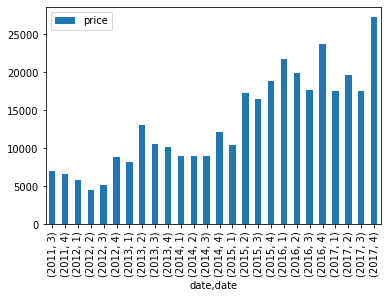

In [104]:
# df.groupby([df.index.year, df.index.quarter])
df.groupby([df.index.year, df.index.quarter]).agg({'price':'mean'})
df.groupby([df.index.year, df.index.quarter]).agg({'price':'mean'}).plot(kind='bar')

In [103]:
%matplotlib inline

Text(0.5, 1.0, '기간별 제품 평균가격')

Text(0.5, 0, '기간')

Text(0, 0.5, '가격')

/Users/jihogrammer/workspace/python-venv/quant/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 44592 (\N{HANGUL SYLLABLE GI}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/jihogrammer/workspace/python-venv/quant/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 44036 (\N{HANGUL SYLLABLE GAN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/jihogrammer/workspace/python-venv/quant/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 48324 (\N{HANGUL SYLLABLE BYEOL}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/jihogrammer/workspace/python-venv/quant/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 51228 (\N{HANGUL SYLLABLE JE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/jihogrammer/workspace/python-venv/quant/lib/python3.9/site-packages/IPython/core/pyla

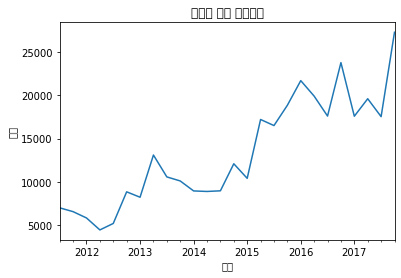

In [105]:
ax = df.resample('Q')['price'].mean().plot()

ax.set_title('기간별 제품 평균가격')
ax.set_xlabel('기간')
ax.set_ylabel('가격')

In [106]:
df.groupby(['brand']).agg({'name':'count'})

,name
brand,
apple,5399
mi,1558
micromax,8078
samsung,7284


<AxesSubplot:xlabel='brand'>

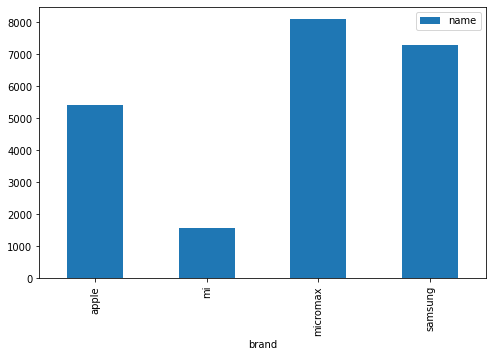

In [107]:
df.groupby(['brand']).agg({'name':'count'}).plot(kind='bar', figsize=(8,5))